Load data extracted from the scatnet transform and compare it 
with convolutions with vanilla morlet/gabor wavelets.

In [222]:
from os.path import dirname, join
import numpy as np
from numpy import fft
import matplotlib.pylab as plt


from blusky.wavelets.wavelet_factories_1d import (morlet_freq_1d,
                                                  vanilla_gabor_1d, 
                                                  vanilla_morlet_1d)
import blusky.datasets as datasets

In [223]:
base_directory = join(dirname(datasets.__file__), "scatnet")

/Users/blasscock/Documents/Code/sandia-blusky/blusky/wavelets/wavelet_factories_1d.py:36: RuntimeWarning: invalid value encountered in double_scalars
  step = np.pi * 2**(-J/Q) * (1-1/4*sigma0/_sigma_phi*2**(1./Q))/P
/Users/blasscock/.edm/envs/blusky-test/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


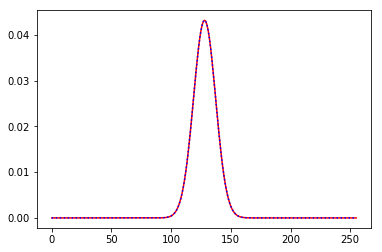

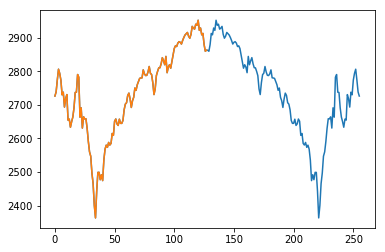

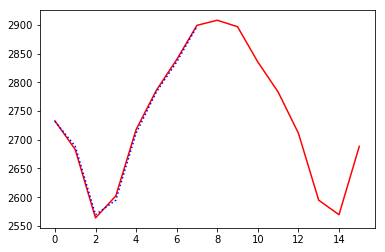

In [249]:
wav = vanilla_gabor_1d(0.001, 5)
x = wav.kernel(256)

freal = np.genfromtxt(join(base_directory, 'fphi_real.csv'),
                     delimiter=',')

fimag = np.genfromtxt(join(base_directory, 'fphi_imag.csv'), 
                     delimiter=',')

ff = freal + fimag*1j


ts = np.genfromtxt(join(base_directory, 'timeseries.csv'),
                     delimiter=',', skip_header=1)
ts_from_sca = np.genfromtxt(join(base_directory, 'x.csv'),
                     delimiter=',')
x_phi = np.genfromtxt(join(base_directory, 'x_phi.csv'),
                     delimiter=',')

xmf = np.fft.fft(ts_from_sca)
xf = np.fft.fft(x)
yf = np.atleast_2d(xmf * xf).T

dsj = 6
_yf = yf.reshape([int(yf.shape[0]/2**dsj), int(2**dsj), yf.shape[1]])
_yf = np.squeeze(np.sum(_yf, axis=1))

y = np.fft.ifft(_yf)/(2**6)

_xm = np.pad(ts[:128,1], 128, mode='reflect')
yp = np.convolve(np.abs(_xm), x, mode="same")

plt.figure()
plt.plot(np.fft.fftshift(np.fft.ifft(ff)), '-r')
plt.plot(x.real, ':b')
plt.show()

plt.figure()
plt.plot(ts_from_sca)
plt.plot(ts[:128,1])
plt.show()

plt.figure()
plt.plot(x_phi,"-r")
plt.plot(yp[128:-128:16],":b")
plt.show()

/Users/blasscock/Documents/Code/sandia-blusky/blusky/wavelets/wavelet_factories_1d.py:36: RuntimeWarning: invalid value encountered in double_scalars
  step = np.pi * 2**(-J/Q) * (1-1/4*sigma0/_sigma_phi*2**(1./Q))/P


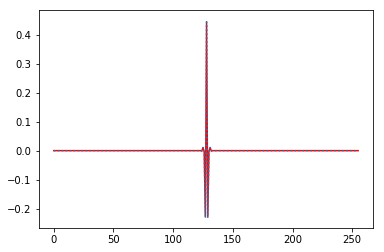

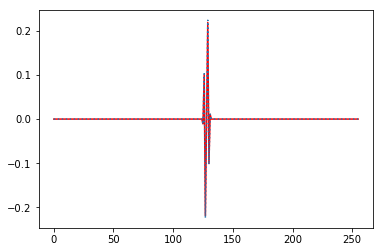

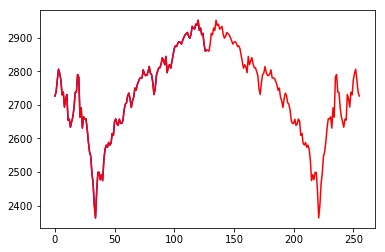

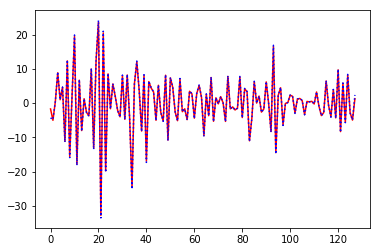

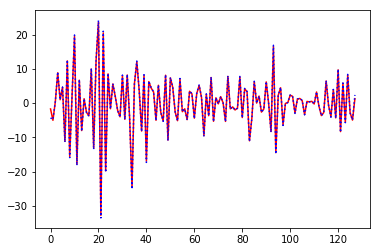

In [253]:
wav = vanilla_morlet_1d(0.001, 5, 0)
x = wav.kernel(128*2)

freal = np.genfromtxt(join(base_directory, 'fpsi_real-p1-j0.csv'),
                     delimiter=',')

fimag = np.genfromtxt(join(base_directory, 'fpsi_imag-p1-j0.csv'),
                     delimiter=',')

ff = freal + fimag*1j

plt.figure()
plt.plot(np.fft.fftshift(np.fft.ifft(ff)).real, '-r')
plt.plot(x.real,":")
plt.show()

plt.figure()
plt.plot(np.fft.fftshift(np.fft.ifft(ff)).imag, '-r')
plt.plot(x.imag,":")
plt.show()

ts = np.genfromtxt(join(base_directory, 'timeseries.csv'),
                   delimiter=',', 
                   skip_header=1)[:,1]
ts_from_sca = np.genfromtxt(join(base_directory, 'x-p1-j0.csv'),
                            delimiter=',')
x_psi = np.genfromtxt(join(base_directory, 'x_psi_real-p1-j0.csv'),
                     delimiter=',')
_xm = np.pad(ts[:128], 64, mode='reflect')

xmf = np.fft.fft(_xm)
xf = np.fft.fft(x)
yf = np.atleast_2d(xmf * xf).T

dsj = 0
_yf = yf.reshape([int(yf.shape[0]/2**dsj), int(2**dsj), yf.shape[1]])
_yf = np.squeeze(np.sum(_yf, axis=1))
y = np.fft.ifft(_yf)/(2**dsj)

yp = np.convolve(x,_xm,mode='same')


plt.figure()
plt.plot(ts[:128], '-b')
plt.plot(ts_from_sca, '-r')
plt.show()


plt.figure()
plt.plot(np.arange(0,128,1), x_psi.real[:128], '-r')
plt.plot(np.round(yp[65:-63].real,1), ':b')
plt.show()


plt.figure()
plt.plot(np.arange(0,128,1), x_psi.real[:128], '-r')
plt.plot(np.fft.fftshift(np.round(y.real,1))[64:-64], ':b')
plt.show()





In [254]:
# Here we look at the unpadded data
wav = vanilla_morlet_1d(0.001, 5, 2)
x = wav.kernel(128*2)

freal = np.genfromtxt(join(base_directory, 'fpsi_real-p3-j0.csv'),    
                      delimiter=',')

fimag = np.genfromtxt(join(base_directory, 'fpsi_imag-p3-j0.csv'),    
                      delimiter=',')

ff = freal + fimag*1j

plt.figure()
plt.plot(np.fft.fftshift(np.fft.ifft(ff)).real, '-r')
plt.plot(x.real,":")
plt.show()

plt.figure()
plt.plot(np.fft.fftshift(np.fft.ifft(ff)).imag, '-r')
plt.plot(x.imag,":")
plt.show()

ts = np.genfromtxt(join(base_directory, 'timeseries.csv')
        delimiter=',', skip_header=1)

ts_from_sca = np.genfromtxt(join(base_directory, 'x-p3-j0.csv'),
                     delimiter=',')

x_psi = np.genfromtxt(join(base_directory, 'x_psi_real-p3-j0.csv'),
                     delimiter=',')

_xm = np.pad(ts[:128,1], 64, mode='reflect')

xmf = np.fft.fft(_xm)
xf = np.fft.fft(x)
# direct method to compare with
yf = np.atleast_2d(xmf * xf).T

# explore the role of periodization for decimation
dsj = 0
_yf = yf.reshape([int(yf.shape[0]/2**dsj), int(2**dsj), yf.shape[1]])
_yf = np.squeeze(np.sum(_yf, axis=1))
y = np.fft.ifft(_yf)/(2**dsj)

yp = np.convolve(x,_xm,mode='same')

plt.figure()
plt.plot(ts[:128,1], '-b')
plt.plot(ts_from_sca, '-r')
plt.show()

plt.figure()
# is the padding removed?
plt.plot(x_psi[:64],'-r')
plt.plot(yp[65:-62:4], ':b')
plt.show()

plt.figure()
plt.plot(x_psi[:64],'-r')
plt.plot(np.fft.fftshift(np.round(y.real,1))[64:-63:4], ':b')
plt.show()

SyntaxError: invalid syntax (<ipython-input-254-5080a0fde996>, line 24)

/Users/blasscock/Documents/Code/sandia-blusky/blusky/wavelets/wavelet_factories_1d.py:36: RuntimeWarning: invalid value encountered in double_scalars
  step = np.pi * 2**(-J/Q) * (1-1/4*sigma0/_sigma_phi*2**(1./Q))/P


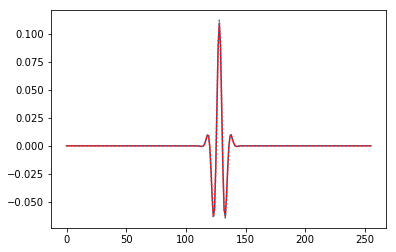

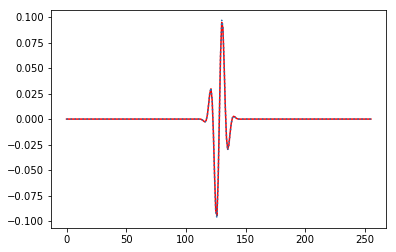

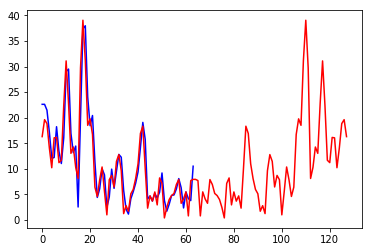

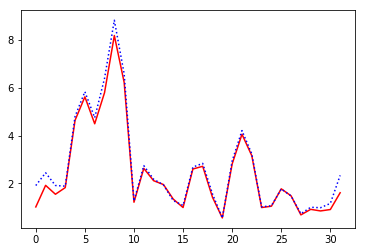

In [255]:
# Here we look at the unpadded data
wav = vanilla_morlet_1d(0.001, 5, 1) # psi2
x1 = wav.kernel(128*2)

wav = vanilla_morlet_1d(0.001, 5, 2) # psi3
x2 = wav.kernel(128*2)

freal = np.genfromtxt(join(base_directory, 'fpsi_real-psi2psi3.csv'),
                      delimiter=',')

fimag = np.genfromtxt(join(base_directory, 'fpsi_imag-psi2psi3.csv'),
                      delimiter=',')

ff = freal + fimag*1j

ts = np.genfromtxt(join(base_directory, 'timeseries.csv'), 
                   delimiter=',', skip_header=1)

ts_from_sca = np.genfromtxt(join(base_directory, 'x-psi2psi3.csv'), 
                            delimiter=',')

x_psi_real = np.genfromtxt(join(base_directory, 
                           'x_psi_real-psi2psi3.csv'), 
                           delimiter=',')

x_psi_imag = np.genfromtxt(join(base_directory, 
                           'x_psi_imag-psi2psi3.csv'), 
                           delimiter=',')

x_psi = x_psi_real + x_psi_imag * 1j

_xm = np.pad(ts[:128,1], 128, mode='reflect')

yp1 = np.convolve(x1,_xm,mode='same')
yp2 = np.convolve(np.abs(np.convolve(x1,_xm,mode='same')), 
                  x2,mode='same')

plt.figure()
plt.plot(np.fft.fftshift(np.fft.ifft(ff)).real, '-r')
plt.plot(x2.real,":")
plt.show()

plt.figure()
plt.plot(np.fft.fftshift(np.fft.ifft(ff)).imag, '-r')
plt.plot(x2.imag,":")
plt.show()

plt.figure()
plt.plot(np.abs(yp1[128:-128:2]), '-b')
plt.plot(ts_from_sca, '-r')
plt.show()


plt.figure()
plt.plot(np.abs(x_psi),'-r')
# phase shift due to zeros "same" padding
plt.plot(np.abs(yp2[122:-128:4][2:]), ':b')
plt.show()
